# EDA with Python and applying ML Algorithms

# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Importing the Data

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Exploratory Data Analysis (EDA)

In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

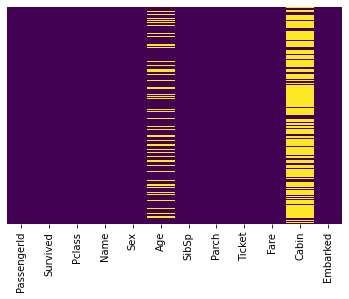

In [5]:
# Visualising the null columns
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We can observe the Age and cabin data are missing mostly. The Age data is missing 20% roughly. Looking at the cabin column, it looks like we are just missing too much of the data.

<AxesSubplot:xlabel='Survived', ylabel='count'>

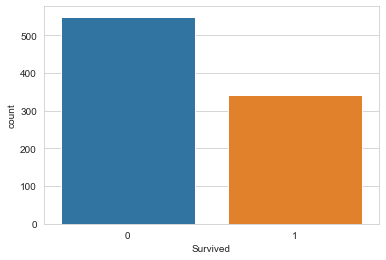

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

<AxesSubplot:xlabel='Sex', ylabel='count'>

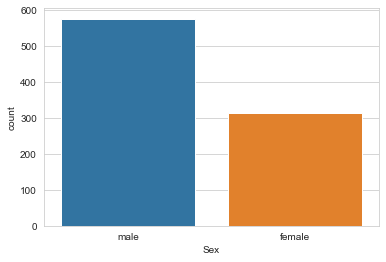

In [7]:
sns.countplot(x='Sex',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

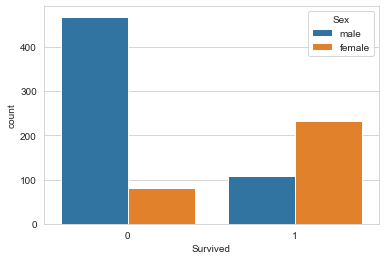

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train)

Most of the people survived are female from the sex plot and the hue pot we can conclude more percentage of survival is recorded in females

<AxesSubplot:xlabel='Survived', ylabel='count'>

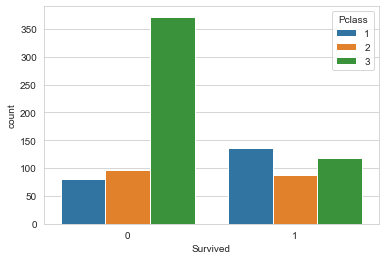

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train)

Most loss occured in passenger class 3 and less loss happened in class 1

<AxesSubplot:xlabel='Age'>

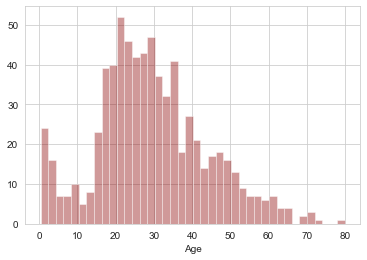

In [10]:
# Understanding the average age of people in titanic
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

Most of the passengers in titanic are aged between 20-30, a very less number of aged people above 65 are attended to titanic

<AxesSubplot:xlabel='SibSp', ylabel='count'>

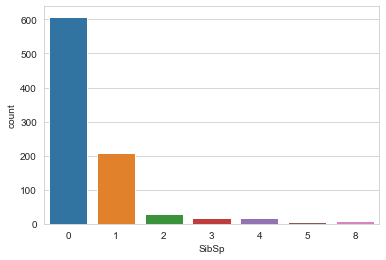

In [11]:
sns.countplot(x='SibSp',data=train)

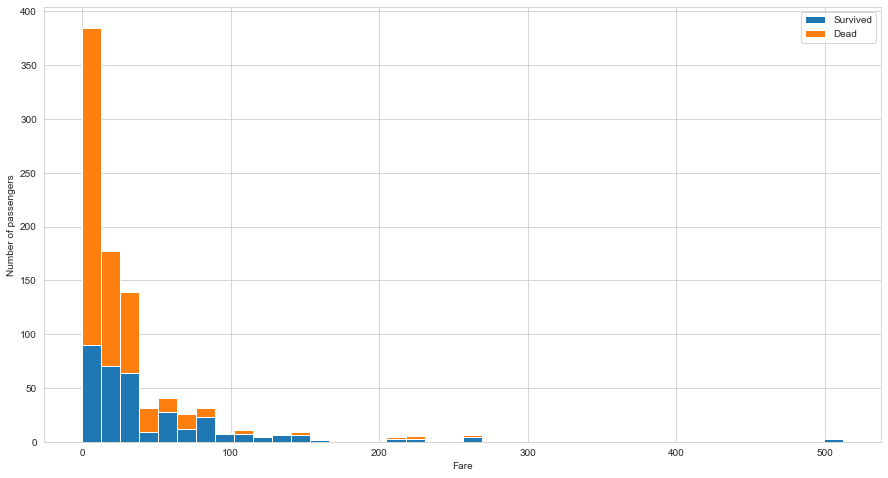

In [12]:
## Visualizing survivals based on fare
figure = plt.figure(figsize=(15, 8))
plt.hist([train[train['Survived'] == 1]['Fare'], train[train['Survived'] == 0]['Fare']], 
         stacked=True, bins = 40, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

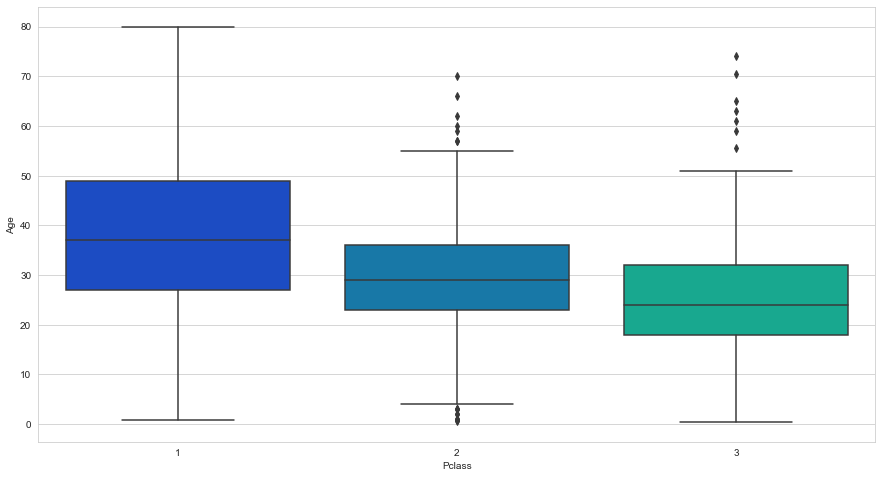

In [13]:
# Checking the average age of passengers in each class
plt.figure(figsize=(15,8))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [14]:
def age(cols):
    
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        
        elif Pclass == 2:
            return 29
        
        else:
            return 24
    
    else:
        return Age

In [15]:
train['Age'] = train[['Age', 'Pclass']].apply(age,axis=1)

<AxesSubplot:>

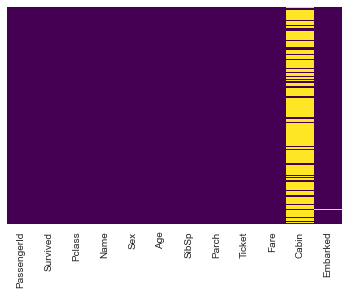

In [16]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Now we can observe only cabin has null values as we replaces the null values of Age with the average age value of the passenger class.

We have a large number of null values in cabin it requires a lot of feature engineering instead of doing feature engineering let we drop this column for now

In [17]:
train.drop('Cabin',axis=1,inplace=True)

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [19]:
train.dropna(inplace=True)

In [20]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


# Converting Categorial Features

In [22]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [23]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [24]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [25]:
# removing unwanted columns
train.drop(['PassengerId','Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [26]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [27]:
train = pd.concat([train,sex,embark],axis=1)

In [28]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,24.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


# Building a Logistic Regression model

In [29]:
train.drop('Survived',axis=1).head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [30]:
train.replace([np.inf, -np.inf], np.nan, inplace=True)

In [31]:
train.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
male        0
Q           0
S           0
dtype: int64

In [32]:
train.dtypes

Survived      int64
Pclass        int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
male          uint8
Q             uint8
S             uint8
dtype: object

In [33]:
# Feature scaling to standardize the values for age and fare
train.Age = (train.Age-min(train.Age))/(max(train.Age)-min(train.Age))
train.Fare = (train.Fare-min(train.Fare))/(max(train.Fare)-min(train.Fare))

In [34]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,0.271174,1,0,0.014151,1,0,1
1,1,1,0.472229,1,0,0.139136,0,0,0
2,1,3,0.321438,0,0,0.015469,0,0,1
3,1,1,0.434531,1,0,0.103644,0,0,1
4,0,3,0.434531,0,0,0.015713,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0.334004,0,0,0.025374,1,0,1
887,1,1,0.233476,0,0,0.058556,0,0,1
888,0,3,0.296306,1,2,0.045771,0,0,1
889,1,1,0.321438,0,0,0.058556,1,0,0


In [35]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [36]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1),
                                                   train['Survived'], test_size=0.35,
                                                   random_state=0,stratify=train.Survived)

# Training the Model

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [39]:
predictions = logmodel.predict(X_test)

In [40]:
from sklearn.metrics import confusion_matrix
accuracy = confusion_matrix(y_test,predictions)

In [41]:
accuracy

array([[165,  28],
       [ 33,  86]], dtype=int64)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.8044871794871795

In [43]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [44]:
y_pred = classifier.predict(X_test)

In [45]:
confusion_matrix(y_test,y_pred)

array([[166,  27],
       [ 29,  90]], dtype=int64)

In [46]:
accuracy_score(y_test,y_pred)

0.8205128205128205

In [76]:
from sklearn.model_selection import cross_validate, GridSearchCV
lr = LogisticRegression()
params = {
    "penalty": ("l1", "l2", "elasticnet"),
    "tol": (0.1, 0.01, 0.001, 0.0001),
    "C": (10.0, 1.0, 0.1, 0.01)
}
clf = GridSearchCV(lr, params, cv=10)
clf.fit(X_train, y_train)
print("Best hyperparameter:", clf.best_params_)

Best hyperparameter: {'C': 0.1, 'penalty': 'l2', 'tol': 0.1}


Train Accuracy: 0.7937608318890814


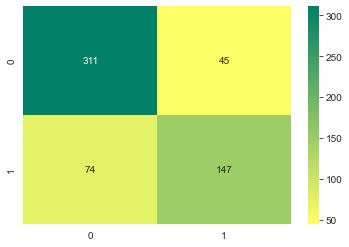

In [81]:
y_pred = clf.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_pred)}")
sns.heatmap(confusion_matrix(y_train, y_pred), fmt='.3g', annot=True, cmap='summer_r')
plt.show()

# Processing test data

In [56]:
test = pd.read_csv('test.csv')

In [57]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [58]:
df=test.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [59]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)

In [60]:
df.drop(['Sex','Embarked'],axis=1,inplace=True)

In [61]:
df = pd.concat([df,sex,embark],axis=1)

In [62]:
df['Age'] = df[['Age', 'Pclass']].apply(age,axis=1)

In [63]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [64]:
df['Fare']=df['Fare'].fillna(df['Fare'].mean())

In [66]:
df.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
male      0
Q         0
S         0
dtype: int64

In [67]:
# Feature scaling to standardize the values for age and fare
df.Age = (df.Age-min(df.Age))/(max(df.Age)-min(df.Age))
df.Fare = (df.Fare-min(df.Fare))/(max(df.Fare)-min(df.Fare))

In [68]:
df

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,0.452723,0,0,0.015282,1,1,0
1,3,0.617566,1,0,0.013663,0,0,1
2,2,0.815377,0,0,0.018909,1,1,0
3,3,0.353818,0,0,0.016908,1,0,1
4,3,0.287881,1,1,0.023984,0,0,1
...,...,...,...,...,...,...,...,...
413,3,0.314256,0,0,0.015713,1,0,1
414,1,0.512066,0,0,0.212559,0,0,0
415,3,0.505473,0,0,0.014151,1,0,1
416,3,0.314256,0,0,0.015713,1,0,1


In [70]:
pred = classifier.predict(df)
pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [71]:
submission = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": pred})
submission.to_csv('submission.csv', index=False)

In [72]:
prediction_data = pd.read_csv('submission.csv')

<AxesSubplot:xlabel='Survived', ylabel='count'>

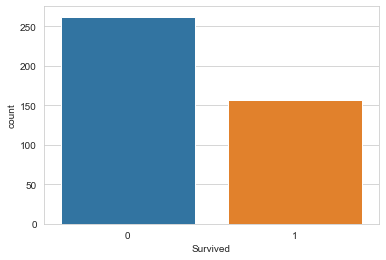

In [73]:
#Visualizing predicted values
sns.countplot(x='Survived', data=prediction_data)